# Problem 1

This problem is about prevention of drug prescription that could cause patient allergy. This laboratory test done in the hospital tp revent such event is called Enzyme-linked immunospot. However, sometime the test could lead to false negative as patient do not response to the test or other factors.
Therefore, we want to solve this problem by developing prediction model prescription of allergic drug.

## Import Packages

In [237]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score, balanced_accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
from sklearn.inspection import permutation_importance

import scikitplot as skplt

In [238]:
set_config('diagram')
pd.set_option('display.max_rows', None)

## Import CSV File

In [239]:
df = pd.read_csv('.\data\DrugAllergyKaggle_v3_050720.csv')

In [240]:
df

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,451,0,57,2648,554.0,2.0,1.0,8.0,0,0.0,0,1,0.0,0.0,2,2.0,2,NaN
1,431,0,38,2492,542.0,2.0,1.0,10.0,0,0.0,0,1,0.0,0.0,2,1.0,7,NaN
2,378,0,58,808,439.0,NaN,NaN,4.0,1,0.0,0,1,1.0,0.0,2,6.0,2,NaN
3,101,0,63,2700,431.0,NaN,NaN,16.0,1,0.0,0,0,0.0,0.0,2,2.0,6,NaN
4,352,0,13,2060,338.0,NaN,NaN,NaN,0,0.0,0,0,0.0,0.0,3,1.0,3,NaN
5,383,1,10,2368,273.0,NaN,NaN,NaN,0,0.0,0,0,0.0,1.0,1,6.0,3,NaN
6,399,1,57,1500,232.0,NaN,NaN,NaN,0,0.0,0,0,0.0,0.0,3,6.0,3,NaN
7,550,1,34,1824,225.0,5.0,2.0,2.0,1,0.0,0,0,0.0,0.0,2,7.0,7,NaN
8,212,0,36,2548,218.0,NaN,NaN,11.0,0,0.0,0,1,0.0,0.0,2,5.0,2,NaN
9,69,0,29,2080,207.0,NaN,NaN,12.0,1,0.0,0,1,0.0,1.0,2,1.0,2,NaN


## Data Exploration

How many subject there are in this study?

In [241]:
df['Patient_ID'].nunique()

298

Are there multiple result for each subjects for each drug group?

In [242]:
df.groupby(['Patient_ID', 'Drug_Group'])['Patient_ID', 'Drug_Group'].agg('count')

<ipython-input-242-4149d23403b3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Patient_ID', 'Drug_Group'])['Patient_ID', 'Drug_Group'].agg('count')


Patient_ID  Drug_Group
Patient_ID Drug_Group                        
2          2                    1           1
7          4                    1           1
13         1                    1           1
           3                    1           1
18         1                    5           5
19         1                    1           1
           4                    1           1
21         2                    1           1
26         1                    2           2
           3                    1           1
28         2                    1           1
           6                    1           1
33         4                    1           1
34         6                    1           1
35         2                    1           1
           6                    1           1
37         1                    3           3
           3                    1           1
           6                    1           1
38         1                    1           1
           3                    2           2
49         4                    1           1
51         2                    1           1
           7                    1           1
53         6                    1           1
54         2                    1           1
55         4                    1           1
60         6                    1           1
62         1                    2           2
           4                    1           1
           5                    1           1
68         1                    2           2
           3                    1           1
69         2                    1           1
76         1                    1           1
           5                    1           1
77         2                    1           1
           3                    1           1
79         1                    2           2
           3                    1           1
80         4                    1           1
81         2                    1           1
89         1                    3           3
           6                    1           1
95         2                    1           1
           3                    1           1
           7                    5           5
101        4                    1           1
           6                    1           1
102        6                    1           1
109        4                    1           1
           5                    1           1
113        5                    2           2
115        2                    1           1
117        6                    1           1
120        1                    1           1
           3                    1           1
126        1                    1           1
           4                    1           1
129        6                    1           1
130        4                    1           1
132        1                    2           2
           3                    1           1
142        1                    3           3
           4                    1           1
146        1                    6           6
           3                    1           1
147        7                    2           2
149        3                    1           1
161        1                    4           4
167        1                    2           2
170        2                    1           1
           6                    1           1
180        6                    1           1
188        2                    1           1
           6                    1           1
193        1                    1           1
194        6                    1           1
           7                    1           1
196        1                    2           2
           3                    1           1
201        1                    1           1
           3                    1           1
203        4                    1           1
204        7                    4           4
205        1         

Even though there are multiple tests for certain subjects, I will assume that these test are independent to each other.

What are the number of male and female?

In [243]:
df['Gender'].value_counts()

1    452
0    347
Name: Gender, dtype: int64

What are the subject's age range in this dataset?

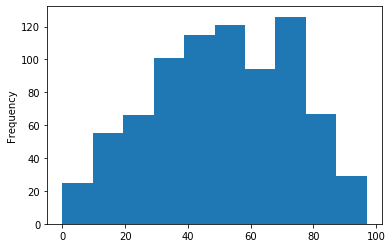

In [244]:
df['Age_Year'].plot.hist(bins = 10)

Most subjects are age around 40-60 years

In this dataset there are some missing value in the features and only 14% of ground truth label. In this scenario, I wouldn't try to impute the data as my knowledge in drug domain is limited. Therefore, we need the models that could be able to handle missing value.

What are the % of missing value of the features?

In [245]:
pd.Series(
    (df.isna().sum() / len(df))
).sort_values(ascending=False)

Drug_Rechallenge_Result    0.857322
Naranjo_Score              0.460576
Naranjo_Category           0.362954
Exposure_Time              0.221527
Allergic_Reaction_Group    0.035044
Underlying_Condition_A     0.022528
Underlying_Condition_D     0.017522
Underlying_Condition_E     0.001252
ELISpot_Result             0.001252
Gender                     0.000000
Age_Year                   0.000000
ELISpot_Control            0.000000
Steroid_Usage              0.000000
Drug_Group                 0.000000
Underlying_Condition_B     0.000000
Underlying_Condition_C     0.000000
Suspicion_Score            0.000000
Patient_ID                 0.000000
dtype: float64

As expected, the feature with highest percentage of missing value is the ground truth and follow by Naranjo_Score and Naranjo_Category features.
Now I want to know whether the similar features have the correlation or not.

Let now see the correlation between the features

In [246]:
dummy_df = df.copy()
dummy_df = dummy_df.drop(['Patient_ID'], axis=1)

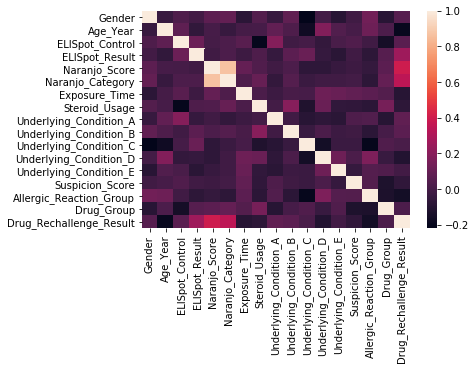

In [247]:
sns.heatmap(dummy_df.corr(), 
        xticklabels=dummy_df.columns,
        yticklabels=dummy_df.columns)

We can see the 'Naranjo_Score' and 'Naranjo_Category' have very high correlation (0.87). We might consider remove this features later.

Let's see the data distribution between the features.

D:\Users\petch\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\petch\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\petch\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\petch\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\petch\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Users\petch\anaconda3\envs\keras

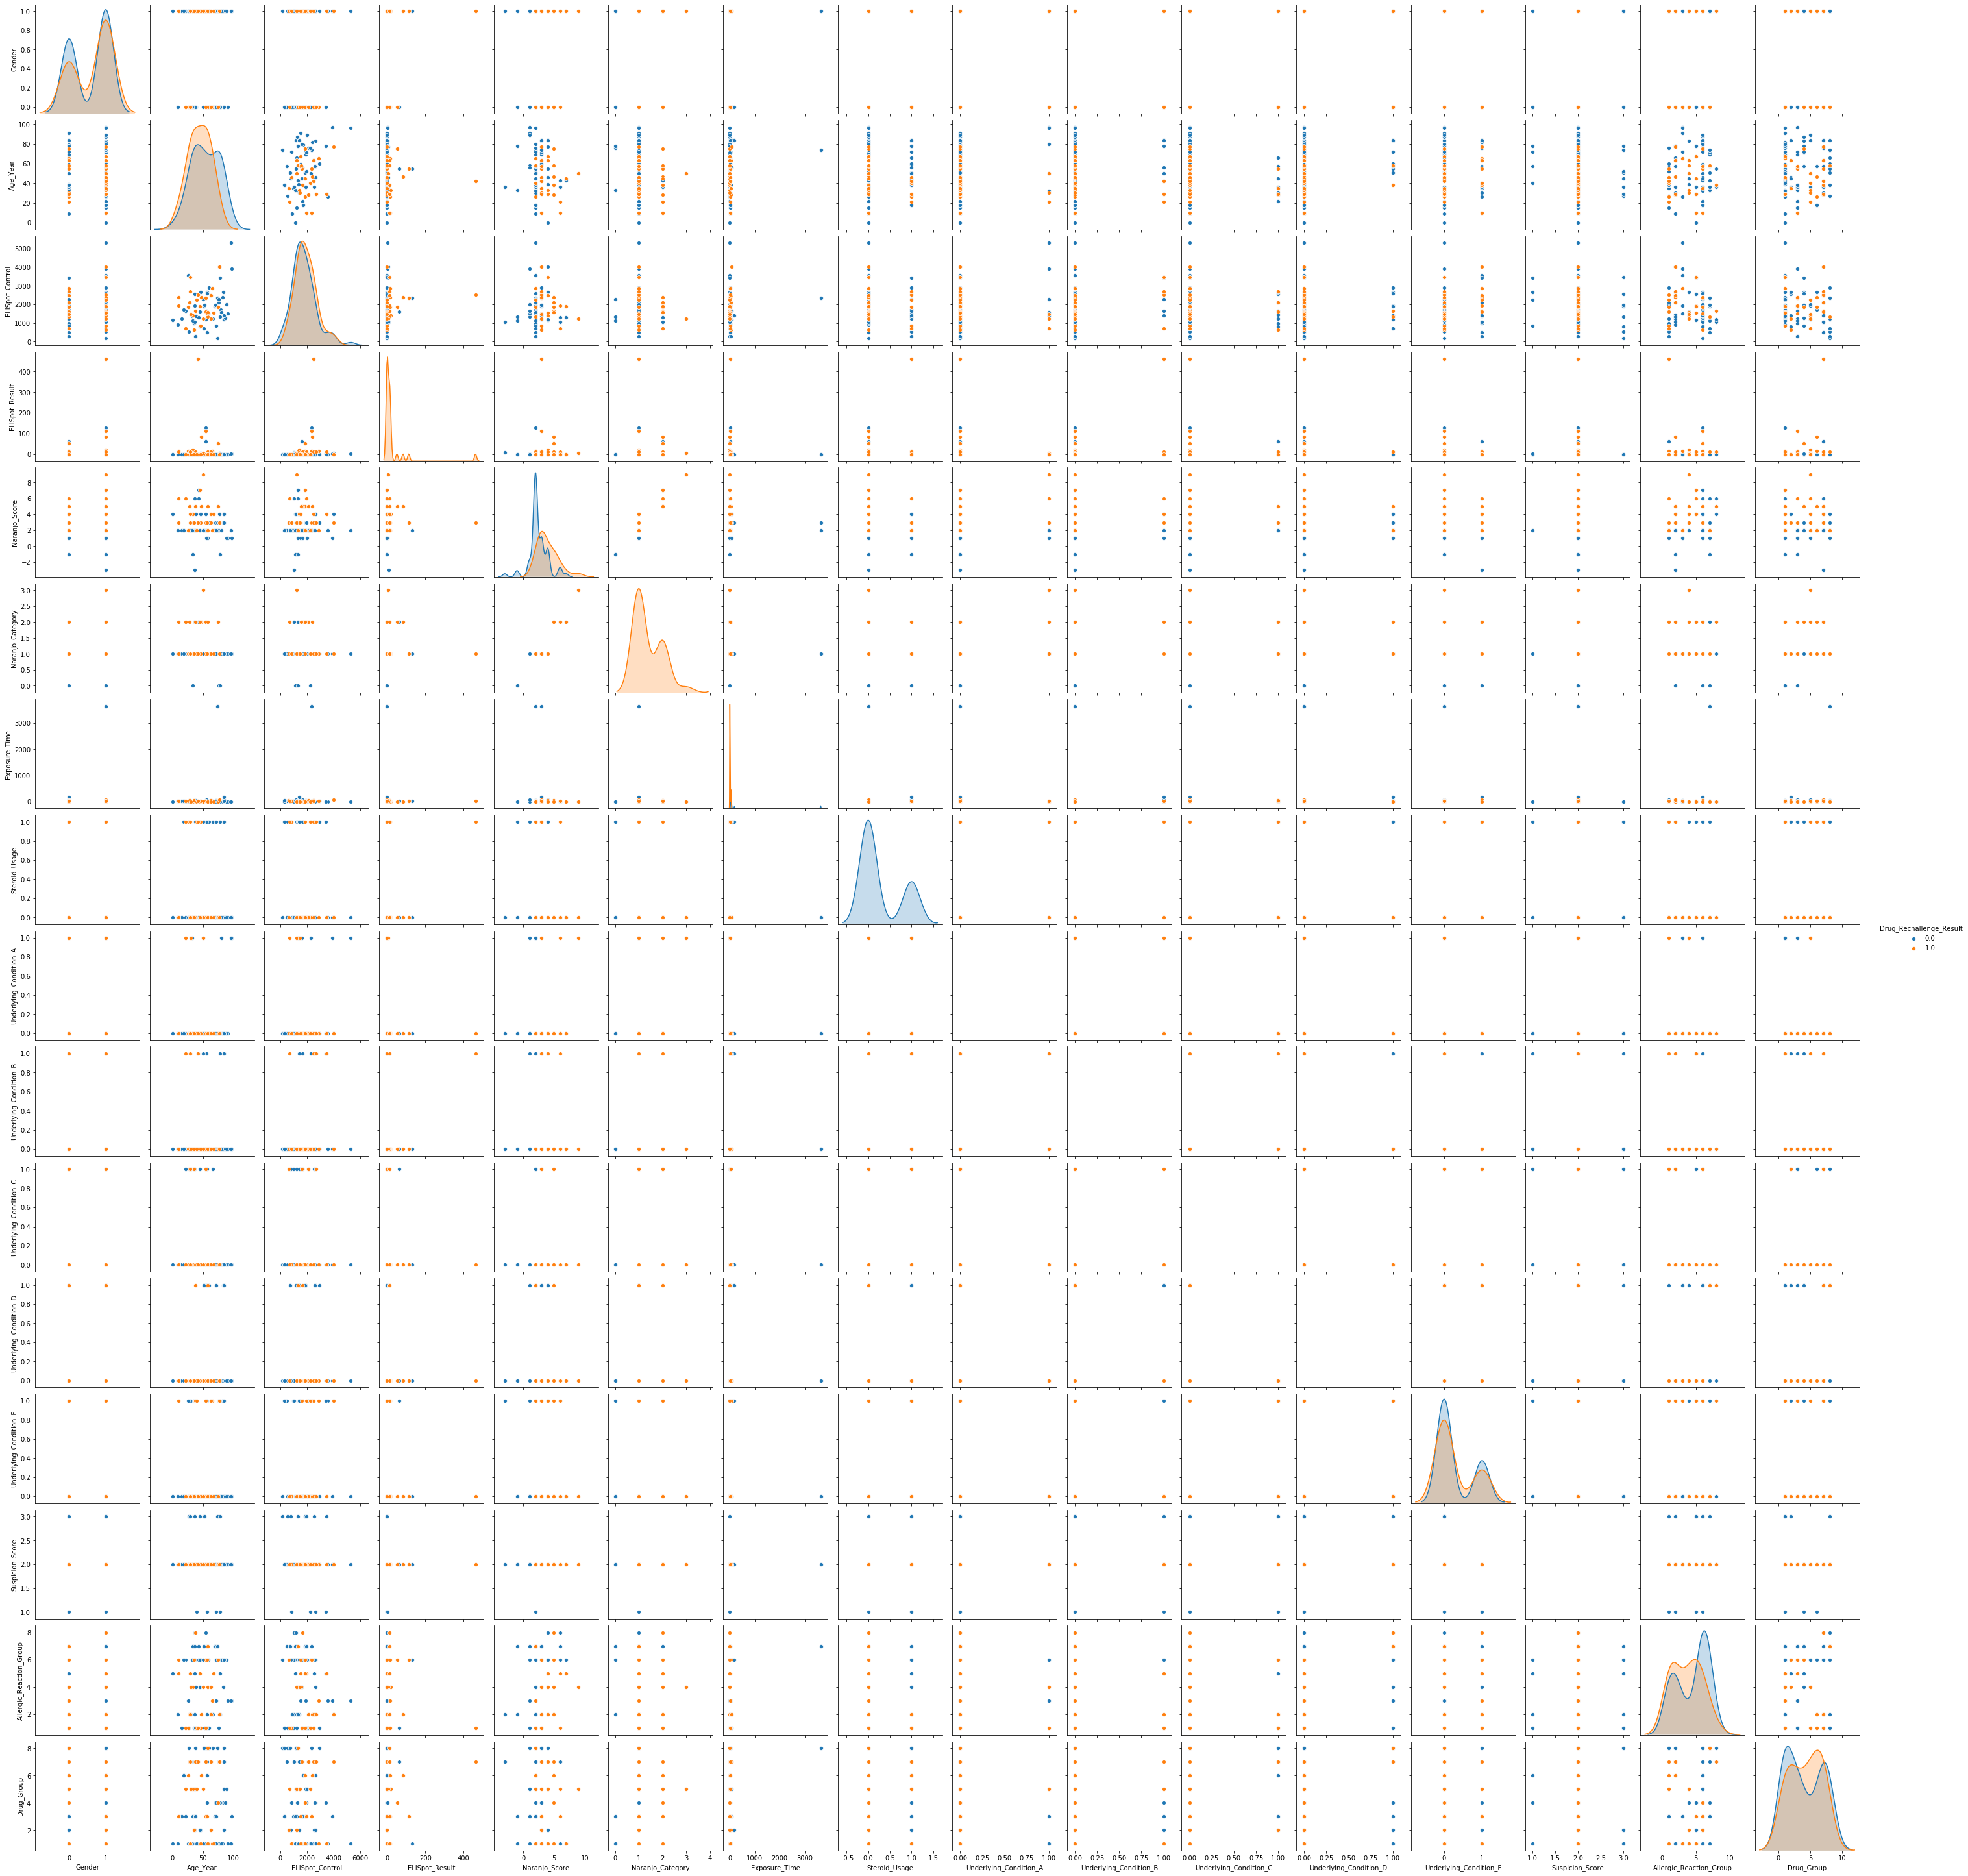

In [248]:
sns.pairplot(dummy_df, hue="Drug_Rechallenge_Result", dropna=True)

Here, we can see that 'Age_Year', 'Naranjo_Score', 'Allergic_Reaction_Group', and 'Drug_Group' might be useful features for model prediction. 'ELISpot_result' and 'Exposure_Time' is very skewed. We might need to explore whether therer is an outlier.

How many grouth truth available?

In [249]:
df['Drug_Rechallenge_Result'].value_counts().sum()

114

How many ground truth labeled and 1 and 0?

In [250]:
df['Drug_Rechallenge_Result'].value_counts()

0.0    86
1.0    28
Name: Drug_Rechallenge_Result, dtype: int64

So this is imbalance dataset which is the problem we need to address in the model.

## Data Cleaning

Check if there are outlier of the 'ELISpot_result' and 'Exposure_Time'.

In [251]:
df[['Patient_ID', 'ELISpot_Result', 'Exposure_Time', 'Drug_Rechallenge_Result']]

,Patient_ID,ELISpot_Result,Exposure_Time,Drug_Rechallenge_Result
0,451,554.0,8.0,NaN
1,431,542.0,10.0,NaN
2,378,439.0,4.0,NaN
3,101,431.0,16.0,NaN
4,352,338.0,NaN,NaN
5,383,273.0,NaN,NaN
6,399,232.0,NaN,NaN
7,550,225.0,2.0,NaN
8,212,218.0,11.0,NaN
9,69,207.0,12.0,NaN


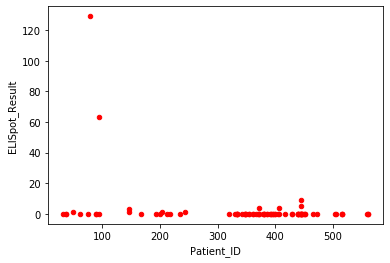

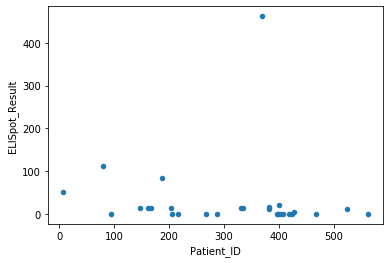

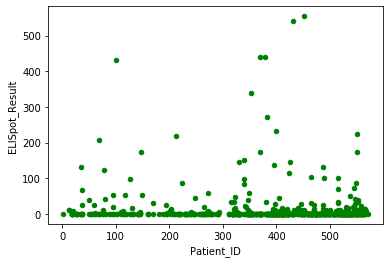

In [252]:
# Drug_Rechallenge_Result = 0
df.loc[df['Drug_Rechallenge_Result'] == 0, :].plot.scatter(x='Patient_ID', y = 'ELISpot_Result', c='red')

# Drug_Rechallenge_Result = 1
df.loc[df['Drug_Rechallenge_Result'] == 1, :].plot.scatter(x='Patient_ID', y = 'ELISpot_Result')

# Drug_Rechallenge_Result = NaN
df.loc[df['Drug_Rechallenge_Result'].isna(), :].plot.scatter(x='Patient_ID', y = 'ELISpot_Result', c='green')

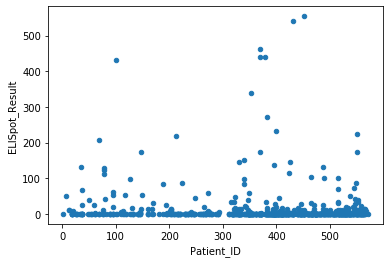

In [253]:
# All 'ELISpot_Result' result
df.plot.scatter(x='Patient_ID', y = 'ELISpot_Result')

According to scatter plot of the 'ELISpot_Result' that has no groud truth, by visualization, it is possible that the value could be as high as 500.

In [254]:
df['Exposure_Time'].describe()

count      622.000000
mean       428.533762
std       3922.748736
min         -9.000000
25%          3.000000
50%         10.500000
75%         21.000000
max      43281.000000
Name: Exposure_Time, dtype: float64

In [255]:
df.loc[df['Exposure_Time'] < 0, :]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
186,352,0,13,2060,0.0,NaN,0.0,-3.0,0,0.0,0,0,0.0,0.0,2,1.0,1,NaN
789,319,1,56,1664,0.0,NaN,NaN,-9.0,1,0.0,1,0,0.0,1.0,2,1.0,8,NaN


There is negative exposure time, I assume that this problem time cannot be negative and it has no so 'Drug_Rechallenge_Result. Therefore, I will remove this observation.

In [256]:
idx = df.loc[df['Exposure_Time'] < 0, :].index
df = df.drop(idx)

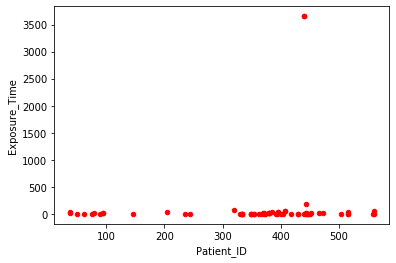

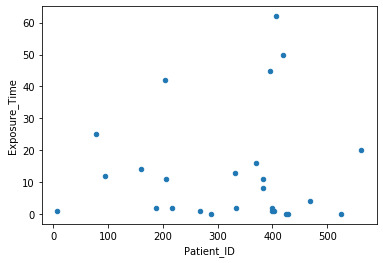

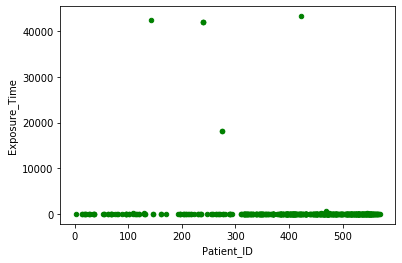

In [257]:
df.loc[df['Drug_Rechallenge_Result'] == 0, :].plot.scatter(x='Patient_ID', y = 'Exposure_Time', c='red')
df.loc[df['Drug_Rechallenge_Result'] == 1, :].plot.scatter(x='Patient_ID', y = 'Exposure_Time')
df.loc[df['Drug_Rechallenge_Result'].isna(), :].plot.scatter(x='Patient_ID', y = 'Exposure_Time', c='green')

By looking at the 'Exposure Time', the one observation on the 'Drug_Rechallenge_Result' = 0 has very high exposure time and four data points exposure time more than 10,000. I belive that latter are outliers. Lets see its data.

In [258]:
# observation with time > 1000 that 'Drug_Rechallenge_Result' = 0

mask = (
    (df['Exposure_Time'] > 1000) &
    (df['Drug_Rechallenge_Result'] == 0)
)

df[mask]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
471,440,1,74,2336,0.0,3.0,1.0,3653.0,0,0.0,0,0,0.0,0.0,2,7.0,8,0.0
472,440,1,74,2336,0.0,2.0,1.0,3653.0,0,0.0,0,0,0.0,0.0,2,7.0,8,0.0


These observation contain the ground truth as well. Does this subject have multiple tests?

In [259]:
df.loc[df['Patient_ID'] == 440]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
66,440,1,74,2336,17.0,2.0,1.0,7.0,0,0.0,0,0,0.0,0.0,2,7.0,8,NaN
471,440,1,74,2336,0.0,3.0,1.0,3653.0,0,0.0,0,0,0.0,0.0,2,7.0,8,0.0
472,440,1,74,2336,0.0,2.0,1.0,3653.0,0,0.0,0,0,0.0,0.0,2,7.0,8,0.0
473,440,1,74,180,0.0,NaN,NaN,NaN,0,0.0,0,0,0.0,0.0,3,6.0,8,0.0
474,440,1,74,180,0.0,2.0,1.0,1.0,0,0.0,0,0,0.0,0.0,2,6.0,2,NaN


Hmm, it might be possible that because of 'Drug_Group' = 8 will have long 'Exposure_Time'. Let's see is this true.

In [260]:
df.loc[df['Drug_Group'] == 8]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
11,339,1,58,1956,151.0,NaN,NaN,0.0,1,0.0,0,0,0.0,0.0,2,5.0,8,NaN
26,339,1,58,1956,85.0,NaN,NaN,7.0,1,0.0,0,0,0.0,0.0,2,5.0,8,NaN
28,544,1,22,972,74.0,2.0,1.0,24.0,1,0.0,0,0,0.0,0.0,2,1.0,8,NaN
57,557,1,41,1540,23.0,5.0,2.0,1.0,0,0.0,0,0,0.0,0.0,2,6.0,8,NaN
66,440,1,74,2336,17.0,2.0,1.0,7.0,0,0.0,0,0,0.0,0.0,2,7.0,8,NaN
79,334,0,58,1340,13.0,2.0,1.0,2.0,0,0.0,0,0,1.0,0.0,2,7.0,8,1.0
123,240,0,53,2572,5.0,NaN,NaN,42038.0,0,0.0,0,0,1.0,1.0,2,8.0,8,NaN
148,240,0,53,2572,2.0,NaN,NaN,42038.0,0,0.0,0,0,1.0,1.0,2,8.0,8,NaN
150,325,1,60,2560,2.0,NaN,NaN,NaN,0,0.0,0,0,0.0,0.0,3,8.0,8,NaN
156,240,0,53,2572,1.0,NaN,NaN,42038.0,0,0.0,0,0,1.0,1.0,2,8.0,8,NaN


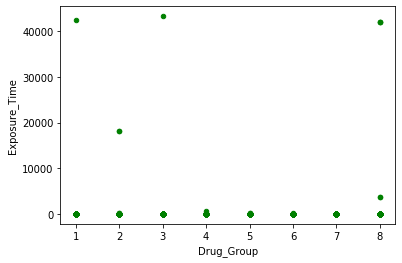

In [261]:
df.plot.scatter(x='Drug_Group', y = 'Exposure_Time', c='green')

The result indicate that most of the test of Drug_Group = 8 doesn't take long Exposure Time. However, these observations have ground truth therefore I assume that this is a mistake from the equipment and treated as missing completely at random. I will impute by using median of the whole dataset. This is because the Time_Exposure is very skewed and it doesn't show correlation of Drug_Group and Time_exposure. Also, I will remove the outlier that has 'Exposure_Time' more than 10,000.

In [262]:
idx = df.loc[df['Exposure_Time'] > 10000].index
df = df.drop(idx)

## Imputation

Firstly, I will impute the Exposure_Time according to the reason above.

In [263]:
median_time = np.nanmedian(df['Exposure_Time'], axis=0)
mask = (
    (df['Exposure_Time'] > 1000) &
    (df['Drug_Rechallenge_Result'] == 0)
)

idx = df[mask].index
df.loc[idx, 'Exposure_Time'] = median_time
df.loc[idx, ]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
471,440,1,74,2336,0.0,3.0,1.0,10.0,0,0.0,0,0,0.0,0.0,2,7.0,8,0.0
472,440,1,74,2336,0.0,2.0,1.0,10.0,0,0.0,0,0,0.0,0.0,2,7.0,8,0.0


Secondly, 'Naranjo_Score' and 'Naranjo_Category' features have very high correlation and we could impute this. Let's explore theese two features.

In [264]:
df['Naranjo_Category'].value_counts()

1.0    371
2.0    107
0.0     20
3.0      7
Name: Naranjo_Category, dtype: int64

There are four level of Naranjo. Let's see how each level correlate with Naranjo Score

In [265]:
df[df['Naranjo_Category'] == 0]['Naranjo_Score'].value_counts()

 0.0    6
-1.0    5
-2.0    2
Name: Naranjo_Score, dtype: int64

In [266]:
df[df['Naranjo_Category'] == 1]['Naranjo_Score'].value_counts()

3.0    148
2.0    101
4.0     50
1.0     29
Name: Naranjo_Score, dtype: int64

In [267]:
df[df['Naranjo_Category'] == 2]['Naranjo_Score'].value_counts()

5.0    47
6.0    15
7.0    12
8.0    10
Name: Naranjo_Score, dtype: int64

In [268]:
df[df['Naranjo_Category'] == 3]['Naranjo_Score'].value_counts()

9.0    4
Name: Naranjo_Score, dtype: int64

This shows a pattern that the higher the Naranjo score, the higher the Naranjo Category. So, i will use this information to impute the data.

In [269]:
((df['Naranjo_Category'].notna()) & (df['Naranjo_Score'].isna())).sum()

76

In [270]:
((df['Naranjo_Score'].notna()) & (df['Naranjo_Category'].isna())).sum()

1

This shows that its better to use Naranjo_category to impute Naranjo_Score as there is more data available to impute. However, even i impute the 'Naranjo_Score' using 'Naranjo_Category'. There will be only 79 imputated data added which reduce the number of missing data to 290+79 = 369. This would not help much as 'Naranjo_Category' a lot less missing value (368 missing value). Therefore, I will impute Naranjo_category using Naranjo_Score. I will impute by using the knowledge that it has a correlation between this two variables.

In [271]:
# get subject index that is going to be impute
mask = ((df['Naranjo_Score'].notna()) & (df['Naranjo_Category'].isna()))
idx = df[mask].index
df.loc[idx, :]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
105,445,1,36,1044,9.0,-3.0,NaN,NaN,0,0.0,0,0,0.0,1.0,2,2.0,7,0.0


The 'Naranjo_Score' of subjects 445 has -3 score, therefore the 'Naranj_category' should be 0.

In [272]:
df.loc[idx, 'Naranjo_Category'] = 0
df.loc[idx, :]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
105,445,1,36,1044,9.0,-3.0,0.0,NaN,0,0.0,0,0,0.0,1.0,2,2.0,7,0.0


So, I will remove 'Naranjo Score' because it has high correlation with 'Naranjo Category'

In [273]:
df = df.drop('Naranjo_Score', axis = 1)

Now i will create a new dataframe for predicting 'Naranjo_Category'. I will use all the features that contains all the data for this prediction model.

In [274]:
# One-hot encode the categorical columns
df = pd.get_dummies(df,columns = ['Drug_Group'], drop_first=True)

In [275]:
# use the columns that has no null value for prediction
mask = (df.isna().sum() / len(df)) == 0
cols = df.columns[mask].tolist()
cols.append('ELISpot_Result')
cols.append('Naranjo_Category')
cols

['Patient_ID',
 'Gender',
 'Age_Year',
 'ELISpot_Control',
 'Steroid_Usage',
 'Underlying_Condition_B',
 'Underlying_Condition_C',
 'Suspicion_Score',
 'Drug_Group_2',
 'Drug_Group_3',
 'Drug_Group_4',
 'Drug_Group_5',
 'Drug_Group_6',
 'Drug_Group_7',
 'Drug_Group_8',
 'ELISpot_Result',
 'Naranjo_Category']

In [276]:
df_dummy = df.loc[:,cols]
mask = df_dummy.notnull().all(1)
df_dummy = df_dummy[mask]
df_dummy

,Patient_ID,Gender,Age_Year,ELISpot_Control,Steroid_Usage,Underlying_Condition_B,Underlying_Condition_C,Suspicion_Score,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,ELISpot_Result,Naranjo_Category
0,451,0,57,2648,0,0,1,2,1,0,0,0,0,0,0,554.0,1.0
1,431,0,38,2492,0,0,1,2,0,0,0,0,0,1,0,542.0,1.0
7,550,1,34,1824,1,0,0,2,0,0,0,0,0,1,0,225.0,2.0
10,550,1,34,1824,1,0,0,2,0,0,0,0,0,1,0,174.0,2.0
12,426,1,50,2456,0,0,0,2,0,0,0,1,0,0,0,146.0,2.0
14,487,1,7,1152,0,0,0,2,0,1,0,0,0,0,0,131.0,1.0
16,79,1,55,2344,0,0,0,2,0,0,0,0,0,0,0,129.0,1.0
17,79,1,55,2344,0,0,0,2,0,0,0,0,0,0,0,123.0,2.0
19,79,1,55,2344,0,0,0,2,0,1,0,0,0,0,0,113.0,1.0
20,515,1,43,1600,0,0,0,2,0,0,0,0,0,1,0,101.0,1.0


In [277]:
print(f"The total number of observation for 'Naranjo_Category' prediction is: {len(df_dummy)}")

The total number of observation for 'Naranjo_Category' prediction is: 506


The total number of observation is about 500 observations which is not too small for developing the model. I will use both Logistic Regression and Support Vector Machine to find which model that has better F1 score. I'm going to use F1 score as evaluation metric because this is multiclass classification problem.

In [278]:
# new dataframe
X = df_dummy.loc[:, 'Gender':'ELISpot_Result'].copy()
y = df_dummy['Naranjo_Category'].copy()

In [279]:
X

,Gender,Age_Year,ELISpot_Control,Steroid_Usage,Underlying_Condition_B,Underlying_Condition_C,Suspicion_Score,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,ELISpot_Result
0,0,57,2648,0,0,1,2,1,0,0,0,0,0,0,554.0
1,0,38,2492,0,0,1,2,0,0,0,0,0,1,0,542.0
7,1,34,1824,1,0,0,2,0,0,0,0,0,1,0,225.0
10,1,34,1824,1,0,0,2,0,0,0,0,0,1,0,174.0
12,1,50,2456,0,0,0,2,0,0,0,1,0,0,0,146.0
14,1,7,1152,0,0,0,2,0,1,0,0,0,0,0,131.0
16,1,55,2344,0,0,0,2,0,0,0,0,0,0,0,129.0
17,1,55,2344,0,0,0,2,0,0,0,0,0,0,0,123.0
19,1,55,2344,0,0,0,2,0,1,0,0,0,0,0,113.0
20,1,43,1600,0,0,0,2,0,0,0,0,0,1,0,101.0


In [280]:
# split to train and test data with stratification because imbalance class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28, stratify = y)

In [281]:
# Standardize the data for numercial features. This will help in SVM model to better learn the data.
numerical_cols = ['Age_Year', 'ELISpot_Control', 'ELISpot_Result']

numerical_pipe =  Pipeline([
    ('ss', StandardScaler()),
])


numerical_pipe_minmax =  Pipeline([
    ('mm', MinMaxScaler()),
])


col_transformer = ColumnTransformer(
    transformers=[('num', numerical_pipe, numerical_cols),
                 ], remainder='drop', n_jobs=-1)

col_transformer_minmax = ColumnTransformer(
    transformers=[('num', numerical_pipe_minmax, numerical_cols),
                 ], remainder='drop', n_jobs=-1)

In [282]:
clf = SVC(random_state=28, class_weight='balanced', probability=True)

# Create pipeline to prevent information leakage
pipe = Pipeline([
            ("preprocessing", col_transformer_minmax),
            ("svm", clf)
       ])

params = {'svm__C': [0.001, 0.01, 0.1, 1, 10], 
          'svm__kernel': ['rbf', 'linear'],
          'svm__gamma': np.logspace(-4, 6, 10)
         }
        

In [283]:
# I use f1_weighted as scoring because I assume that all class are equally important.
# I use 20 fold cross-validation to make sure the model is generalize.
svm = GridSearchCV(pipe, 
                           param_grid = params, 
                           scoring='f1_weighted', 
                           cv=10,               
                            n_jobs=-1)

In [284]:
svm.fit(X_train, y_train)

D:\Users\petch\anaconda3\envs\keras\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('mm',
                                                                                          MinMaxScaler(copy=True,
                                                                                                       feature_range=(0,
                                              

In [285]:
print(f"The best score for CV from gridsearch in training set is {round(svm.best_score_,2)}")

The best score for CV from gridsearch in training set is 0.74


In [286]:
yhat = svm.predict(X_train)

In [287]:
print(classification_report(y_train, yhat))

              precision    recall  f1-score   support

         0.0       0.43      1.00      0.60        16
         1.0       1.00      0.91      0.95       278
         2.0       0.90      0.93      0.91        80
         3.0       1.00      1.00      1.00         5

    accuracy                           0.92       379
   macro avg       0.83      0.96      0.87       379
weighted avg       0.95      0.92      0.93       379



In [288]:
# Predict test set
yhat_svm = svm.predict(X_test)
yhat_svm_prob = svm.predict_proba(X_test)

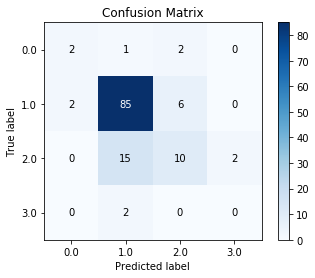

In [289]:
skplt.metrics.plot_confusion_matrix(y_test, yhat_svm)

In [290]:
f1 = f1_score(y_test, yhat_svm, average="weighted")
print(f"The F1 score in test set is {round(f1,2)}")

The F1 score in test set is 0.75


In [291]:
print(classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

         0.0       0.50      0.40      0.44         5
         1.0       0.83      0.91      0.87        93
         2.0       0.56      0.37      0.44        27
         3.0       0.00      0.00      0.00         2

    accuracy                           0.76       127
   macro avg       0.47      0.42      0.44       127
weighted avg       0.74      0.76      0.75       127



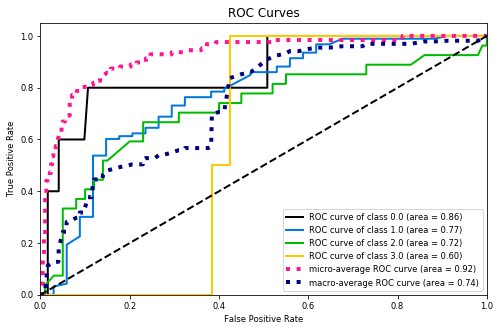

In [292]:
skplt.metrics.plot_roc(y_test, yhat_svm_prob, text_fontsize = 'small', figsize = (8,5))

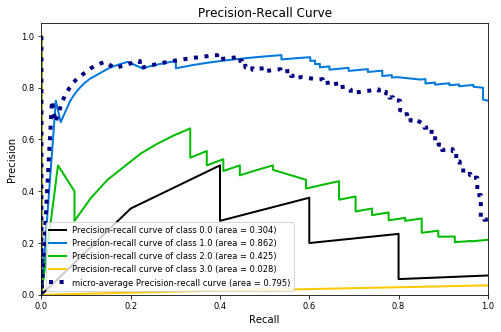

In [293]:
skplt.metrics.plot_precision_recall(y_test, yhat_svm_prob, text_fontsize = 'small', figsize = (8,5))

Now, I will try logistic regression to predict to 'Naranjo_Category'

In [294]:
lr = LogisticRegression(random_state=28)

pipe2 = Pipeline([
            ("preprocessing", col_transformer),
            ("lr", lr)
       ])

params2 = {'lr__C' : np.logspace(-4, 6, 10)}

In [295]:
lr_gs = GridSearchCV(pipe2, 
                  param_grid = params2, 
                  scoring='f1_weighted', 
                  cv=10,               
                  n_jobs=-1)

In [296]:
lr_gs.fit(X_train, y_train)

D:\Users\petch\anaconda3\envs\keras\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('ss',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                            

In [297]:
yhat_lr = lr_gs.predict(X_test)

In [298]:
yhat_lr_prob = lr_gs.predict_proba(X_test)

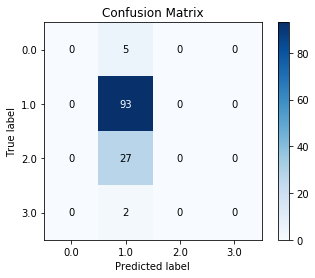

In [299]:
skplt.metrics.plot_confusion_matrix(y_test, yhat_lr)

In [300]:
print(classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.73      1.00      0.85        93
         2.0       0.00      0.00      0.00        27
         3.0       0.00      0.00      0.00         2

    accuracy                           0.73       127
   macro avg       0.18      0.25      0.21       127
weighted avg       0.54      0.73      0.62       127



D:\Users\petch\anaconda3\envs\keras\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


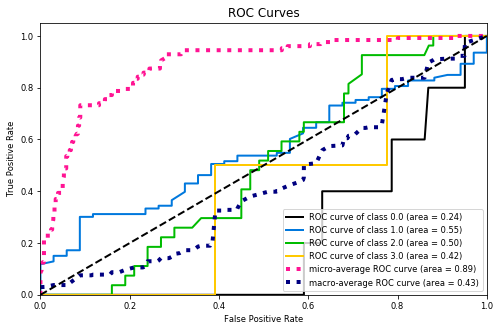

In [301]:
skplt.metrics.plot_roc(y_test, yhat_lr_prob, text_fontsize = 'small', figsize = (8,5))

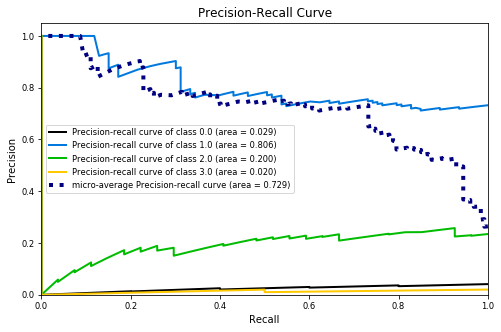

In [302]:
skplt.metrics.plot_precision_recall(y_test, yhat_lr_prob, text_fontsize = 'small', figsize = (8,5))

The results of ROC shows quite a good result but PR cuve is very bad for all classes except class 1. PR Curve should be more focused than ROC curve because of large imbalance class.

In [303]:
lr_f1 = round(f1_score(y_test, yhat_lr, average='weighted'),2)
lr_svm = round(f1_score(y_test, yhat_svm, average='weighted'), 2)
print(f"F1 score for logistic regression is: {lr_f1}")
print(f"F1 score for SVM is: {lr_svm}")

F1 score for logistic regression is: 0.62
F1 score for SVM is: 0.75


The result shows that F1 score for SVM is much higher than logistic regression. Also, according to the confusion matrix, SVM model shows better generalization than logistic regression. Eventhough F1 score is only about 0.75, it is not too bad to be used for imputation of 'Naranjo_Category' feature.

In [304]:
df_dummy2 = df.loc[:,cols]
mask = df_dummy2['Naranjo_Category'].isna()
df_dummy2 = df_dummy2[mask]
df_dummy2 = df_dummy2.loc[:, 'Gender':'ELISpot_Result'].copy()

In [305]:
# dataframe of NA Naranjo_Category
df_dummy2 = df.loc[:,cols]
mask = df_dummy2['Naranjo_Category'].isna()
df_dummy2 = df_dummy2[mask]
df_dummy2 = df_dummy2.loc[:, 'Gender':'ELISpot_Result'].copy()

# select rows that are not NA
df_dummy2 = df_dummy2[df_dummy2.notnull().all(axis=1)]
df_dummy2

,Gender,Age_Year,ELISpot_Control,Steroid_Usage,Underlying_Condition_B,Underlying_Condition_C,Suspicion_Score,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,ELISpot_Result
2,0,58,808,1,0,1,2,1,0,0,0,0,0,0,439.0
3,0,63,2700,1,0,0,2,0,0,0,0,1,0,0,431.0
4,0,13,2060,0,0,0,3,0,1,0,0,0,0,0,338.0
5,1,10,2368,0,0,0,1,0,1,0,0,0,0,0,273.0
6,1,57,1500,0,0,0,3,0,1,0,0,0,0,0,232.0
8,0,36,2548,0,0,1,2,1,0,0,0,0,0,0,218.0
9,0,29,2080,1,0,1,2,1,0,0,0,0,0,0,207.0
11,1,58,1956,1,0,0,2,0,0,0,0,0,0,1,151.0
13,0,26,2208,1,0,0,3,0,0,0,0,0,0,0,146.0
15,1,73,2396,1,0,0,2,0,0,0,0,1,0,0,131.0


In [306]:
# predict
yhat_naranjo_cat = svm.predict(df_dummy2)

In [307]:
df_dummy2['Naranjo_Category'] = list(yhat_naranjo_cat)

In [308]:
# add result back to the dataframe
idx = df_dummy2['Naranjo_Category'].index
df.loc[idx, 'Naranjo_Category'] = df_dummy2['Naranjo_Category']

In [309]:
(df.isna().sum() / len(df)).sort_values()

Patient_ID                 0.000000
Drug_Group_6               0.000000
Drug_Group_5               0.000000
Drug_Group_4               0.000000
Drug_Group_3               0.000000
Drug_Group_2               0.000000
Suspicion_Score            0.000000
Drug_Group_7               0.000000
Underlying_Condition_C     0.000000
Drug_Group_8               0.000000
Steroid_Usage              0.000000
ELISpot_Control            0.000000
Age_Year                   0.000000
Gender                     0.000000
Underlying_Condition_B     0.000000
Underlying_Condition_E     0.001266
Naranjo_Category           0.001266
ELISpot_Result             0.001266
Underlying_Condition_D     0.017722
Underlying_Condition_A     0.022785
Allergic_Reaction_Group    0.035443
Exposure_Time              0.224051
Drug_Rechallenge_Result    0.855696
dtype: float64

## Develop Drug Allergy Prediction Model

The model that I'm going to use for allergy prediction is Randomforest. One of the major reason is that this model is interpretable by looking at the feature importance. This is very crucial as pharmacist and other health care professional need to know which features could lead to drug allergy. Moreover, the data has many missing value and random forest is able to handle missing data efficiently.

In [310]:
# Select only data that has ground truth label
mask = df.notna().all(axis=1)
df_final = df[mask]
df_final = df_final.drop('Patient_ID', axis=1)
df_final

,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,...,Suspicion_Score,Allergic_Reaction_Group,Drug_Rechallenge_Result,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8
16,1,55,2344,129.0,1.0,25.0,0,0.0,0,0,...,2,6.0,0.0,0,0,0,0,0,0,0
19,1,55,2344,113.0,1.0,25.0,0,0.0,0,0,...,2,6.0,1.0,0,1,0,0,0,0,0
27,1,47,2376,83.0,2.0,2.0,0,0.0,0,0,...,2,2.0,1.0,0,0,0,0,1,0,0
31,0,55,1624,63.0,2.0,12.0,0,0.0,0,1,...,2,1.0,0.0,0,0,0,0,0,1,0
37,0,75,1868,51.0,2.0,1.0,0,0.0,0,0,...,2,6.0,1.0,0,0,1,0,0,0,0
59,1,33,1400,20.0,1.0,1.0,0,0.0,0,0,...,2,4.0,1.0,0,0,0,1,0,0,0
69,1,10,2368,16.0,1.0,8.0,0,0.0,0,0,...,2,6.0,1.0,0,1,0,0,0,0,0
71,0,65,2872,15.0,1.0,14.0,0,0.0,0,0,...,2,3.0,1.0,0,0,0,0,0,0,0
77,0,26,1852,14.0,1.0,13.0,1,0.0,0,0,...,2,1.0,1.0,0,0,0,0,1,0,0
79,0,58,1340,13.0,1.0,2.0,0,0.0,0,0,...,2,7.0,1.0,0,0,0,0,0,0,1


In [311]:
# Select feature and class columns
X = df_final.loc[:, 'Gender':'Drug_Group_8']
y = df_final.loc[:, 'Drug_Rechallenge_Result']

The grond truth labeled as 1 is less than 0 labeled almost a third.

In [312]:
# See how many labels in each class
y.value_counts()

0.0    67
1.0    25
Name: Drug_Rechallenge_Result, dtype: int64

In [313]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28, stratify = y)

In [314]:
# Use class weight as balanced because I have imbalance dataset
rf = RandomForestClassifier(random_state=28, class_weight = 'balanced', oob_score=False)

pipe3 = Pipeline([
            ("preprocessing", col_transformer),
            ("rf", rf)
       ])

params = {
    'rf__n_estimators': np.arange(50,300,50),
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : np.arange(3,8,1),
    'rf__criterion' :['gini', 'entropy']
         }

I use recall for scoring because I think that it is important to lower false negative (subject is allertic but predicted as not allergic). This is because it is not lethal to predict the subject is allergic event the subject doesn't allergic to the drug.


In [346]:
rf_gs = GridSearchCV(pipe3, 
                   param_grid = params, 
                   scoring='recall', 
                   cv=20,               
                   n_jobs=-1)

In [347]:
rf_gs.fit(X_train, y_train)

D:\Users\petch\anaconda3\envs\keras\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 19 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=20, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('ss',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                            

In [348]:
# Best parameters from gridsearch
rf_gs.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 3,
 'rf__max_features': 'auto',
 'rf__n_estimators': 50}

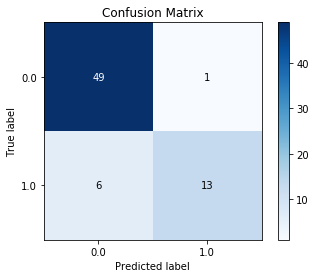

In [349]:
yhat = rf_gs.best_estimator_.predict(X_train)
skplt.metrics.plot_confusion_matrix(y_train, yhat)

In [350]:
# Report in training set
print(classification_report(y_train, yhat))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        50
         1.0       0.93      0.68      0.79        19

    accuracy                           0.90        69
   macro avg       0.91      0.83      0.86        69
weighted avg       0.90      0.90      0.89        69



D:\Users\petch\anaconda3\envs\keras\lib\site-packages\sklearn\compose\_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "
D:\Users\petch\anaconda3\envs\keras\lib\site-packages\sklearn\compose\_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


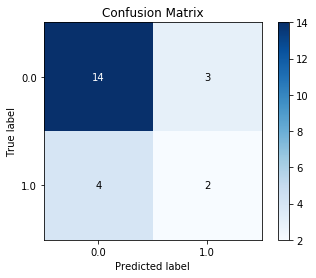

In [351]:
# Predict in test set
yhat = rf_gs.best_estimator_.predict(X_test)
yhat_prob = rf_gs.best_estimator_.predict_proba(X_test)
skplt.metrics.plot_confusion_matrix(y_test, yhat)

In [352]:
# Report of test set
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        17
         1.0       0.40      0.33      0.36         6

    accuracy                           0.70        23
   macro avg       0.59      0.58      0.58        23
weighted avg       0.68      0.70      0.69        23



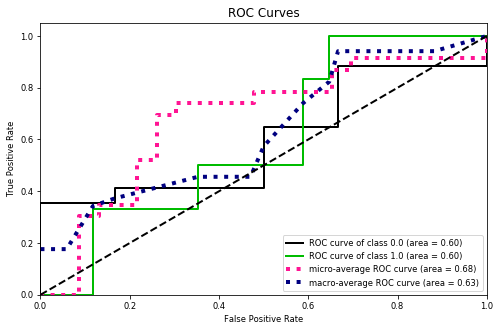

In [353]:
# ROC Curve
skplt.metrics.plot_roc(y_test, yhat_prob, text_fontsize = 'small', figsize = (8,5))

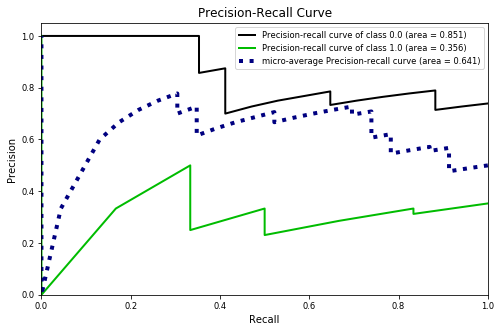

In [354]:
# PR Curve
skplt.metrics.plot_precision_recall(y_test, yhat_prob, text_fontsize = 'small', figsize = (8,5))

The PR curve of the class 1 still bad because it is less than 0.5.

## Feature Importance

In [355]:
result = permutation_importance(rf_gs, X_train, y_train, n_repeats=10,
                                random_state=28, n_jobs=-1)

In [356]:
sorted_idx = result.importances_mean.argsort()

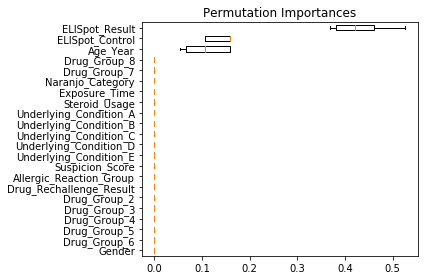

In [357]:
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

It shows that the feature contribute the most in prediction is ELISpot_Result, followed by Drug_Group and Age_Group. Other features doesn't contribute much to the prediction.

## Analysis on Error

In [327]:
X_test['y'] = y_test
X_test['yhat'] = yhat

<ipython-input-327-b632e18a8787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y'] = y_test
<ipython-input-327-b632e18a8787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['yhat'] = yhat


In [328]:
# Incorrect Prediction
mask = X_test['y'] != X_test['yhat']
X_test[mask]

,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,...,Drug_Rechallenge_Result,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,y,yhat
16,1,55,2344,129.0,1.0,25.0,0,0.0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,1.0
790,1,56,1664,0.0,1.0,73.0,1,0.0,1,0,...,0.0,0,1,0,0,0,0,0,0.0,1.0
604,1,40,2248,0.0,1.0,2.0,1,0.0,0,0,...,1.0,0,0,0,1,0,0,0,1.0,0.0
31,0,55,1624,63.0,2.0,12.0,0,0.0,0,1,...,0.0,0,0,0,0,0,1,0,0.0,1.0
451,1,67,1536,0.0,1.0,1.0,0,0.0,0,0,...,1.0,0,0,0,0,0,0,0,1.0,0.0
140,1,50,1240,4.0,3.0,0.0,0,1.0,0,0,...,1.0,0,0,0,1,0,0,0,1.0,0.0
202,0,28,2116,0.0,2.0,45.0,0,0.0,0,1,...,1.0,0,0,0,0,0,1,0,1.0,0.0


In [329]:
# Correct Prediction
mask = X_test['y'] == X_test['yhat']
X_test[mask]

,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,...,Drug_Rechallenge_Result,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,y,yhat
322,0,91,1520,0.0,1.0,3.0,0,0.0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
37,0,75,1868,51.0,2.0,1.0,0,0.0,0,0,...,1.0,0,0,1,0,0,0,0,1.0,1.0
371,1,36,1916,0.0,1.0,1.0,0,0.0,0,0,...,0.0,0,0,0,1,0,0,0,0.0,0.0
159,0,63,2492,1.0,1.0,42.0,0,0.0,0,0,...,0.0,0,0,0,0,0,1,0,0.0,0.0
375,1,36,1916,0.0,1.0,1.0,0,0.0,0,0,...,0.0,0,1,0,0,0,0,0,0.0,0.0
215,0,35,1000,0.0,1.0,12.0,0,0.0,0,1,...,0.0,0,1,0,0,0,0,0,0.0,0.0
689,1,80,1596,0.0,1.0,2.0,0,1.0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
490,1,87,1268,0.0,1.0,5.0,0,0.0,0,0,...,0.0,0,0,1,0,0,0,0,0.0,0.0
316,0,84,1188,0.0,1.0,1.0,0,0.0,0,0,...,0.0,0,0,0,0,0,0,1,0.0,0.0
175,0,9,904,0.0,1.0,18.0,0,0.0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0.0
